In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the data

In [2]:
df = pd.read_csv("medical_examination.csv")

Rename columns

In [3]:
df.rename(columns = {'gluc':'Diabet tendency'}, inplace = True)
df.rename(columns = {'ap_hi':'Systolic blood Pressure'}, inplace = True)
df.rename(columns = {'ap_lo':'Diastolic blood Pressure'}, inplace = True)
df.rename(columns = {'alco':'Drink Alcohol'}, inplace = True)
df.rename(columns = {'active':'Active Lifestyle'}, inplace = True)
df.rename(columns = {'newAge':'Corrected Age'}, inplace = True)
df.rename(columns = {'smoke':'Smokes'}, inplace = True)
df.rename(columns = {'Index_mass':'BMI'}, inplace = True)
df

,id,age,gender,height,weight,Systolic blood Pressure,Diastolic blood Pressure,cholesterol,Diabet tendency,Smokes,Drink Alcohol,Active Lifestyle,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        70000 non-null  int64  
 1   age                       70000 non-null  int64  
 2   gender                    70000 non-null  int64  
 3   height                    70000 non-null  int64  
 4   weight                    70000 non-null  float64
 5   Systolic blood Pressure   70000 non-null  int64  
 6   Diastolic blood Pressure  70000 non-null  int64  
 7   cholesterol               70000 non-null  int64  
 8   Diabet tendency           70000 non-null  int64  
 9   Smokes                    70000 non-null  int64  
 10  Drink Alcohol             70000 non-null  int64  
 11  Active Lifestyle          70000 non-null  int64  
 12  cardio                    70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Get percent of null values

In [5]:
# get the number of missing data points per column
missing = df.isnull().sum()
# how many total missing values do we have?
cells = np.product(df.shape)
total_missing = missing.sum()

# percent of data that is missing
percent_missing = (total_missing/cells) * 100
percent_missing
# fill null values

0.0

Scaling

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Scaled data'}, ylabel='Density'>

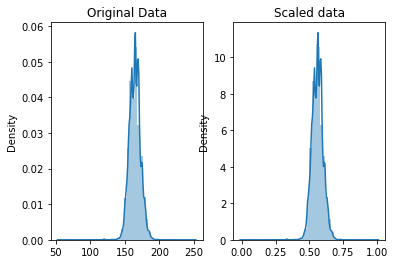

In [6]:
import mlxtend
import seaborn as sns
import matplotlib.pyplot as plt 
occupancy = df.loc[:,"height"]
original= np.array(occupancy)
from mlxtend.preprocessing import minmax_scaling
scaled_data = minmax_scaling(original, columns=[0])
fig,ax = plt.subplots(1,2)
ax[0].set_title("Original Data")
ax[1].set_title("Scaled data")
sns.distplot(original, ax=ax[0])
sns.distplot(scaled_data, ax=ax[1])

Normalization

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

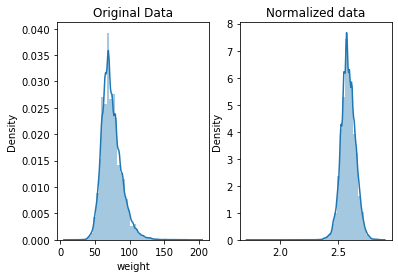

In [7]:
from scipy import stats
reserved = df[ df["weight"]>0]
reserved = reserved.loc[:,"weight"]
reserved1 = np.array(reserved)
normalized_data = stats.boxcox(reserved)
fig, ax=plt.subplots(1,2)
sns.distplot(reserved, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Change some columns and add a new column -->Index_mass

In [8]:
df["age"]= round(df["age"]/365)

In [9]:
df["Index_mass"] = (df["weight"] / (df["height"]**2)*10000)
df.head(15)

,id,age,gender,height,weight,Systolic blood Pressure,Diastolic blood Pressure,cholesterol,Diabet tendency,Smokes,Drink Alcohol,Active Lifestyle,cardio,Index_mass
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
5,8,60.0,1,151,67.0,120,80,2,2,0,0,0,0,29.384676
6,9,61.0,1,157,93.0,130,80,3,1,0,0,1,0,37.729725
7,12,62.0,2,178,95.0,130,90,3,3,0,0,1,1,29.983588
8,13,48.0,1,158,71.0,110,70,1,1,0,0,1,0,28.440955
9,14,54.0,1,164,68.0,110,60,1,1,0,0,0,0,25.282570


Creatng a machine learning model

In [10]:
X, y = df.iloc[:,:], df.iloc[:, -2]

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train.loc[:,["height","weight","Systolic blood Pressure","Diastolic blood Pressure","cholesterol","Diabet tendency","Smokes","Drink Alcohol","Active Lifestyle","Index_mass"]],y_train)

LinearRegression()

Predicting whether a person has a tendency to have a heart attack

In [14]:
id = int(input())
result = model.predict([[df[df["id"] == id]["height"].iloc[0],df[df["id"] == id]["weight"].iloc[0],df[df["id"] == id]["Systolic blood Pressure"].iloc[0],
                         df[df["id"] == id]["Diastolic blood Pressure"].iloc[0],df[df["id"] == id]["cholesterol"].iloc[0],df[df["id"] == id]["Diabet tendency"].iloc[0],
                         df[df["id"] == id]["Smokes"].iloc[0],df[df["id"] == id]["Drink Alcohol"].iloc[0],df[df["id"] == id]["Active Lifestyle"].iloc[0],
                         df[df["id"] == id]["Index_mass"].iloc[0]]]).item()*100
result=round(result,2)
result
if result>50:
    print("You have a penchant for heart disease!.Your result is :",result)
elif result>40 and result<50:
    print("You have a slight tendency to heart disease, you should take medication. Your result is :",result)
else:
    print("You have not a penchant for heart disease!.Your result is:",result)

 4


You have not a penchant for heart disease!.Your result is: 39.98


In [27]:
result = model.predict([[168,62,110,80,1,1,0,0,1,24]]).item()*100
result=np.round(result,2)
result
if result>50:
    print("You have a penchant for heart disease!.Your result is :",result)
elif result>40 and result<50:
    print("You have a slight tendency to heart disease, you should take medication. Your result is :",result)
else:
    print("You have not a penchant for heart disease!.Your result is:",result)

You have not a penchant for heart disease!.Your result is: 35.06


In [18]:
df

,id,age,gender,height,weight,Systolic blood Pressure,Diastolic blood Pressure,cholesterol,Diabet tendency,Smokes,Drink Alcohol,Active Lifestyle,cardio,Index_mass
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


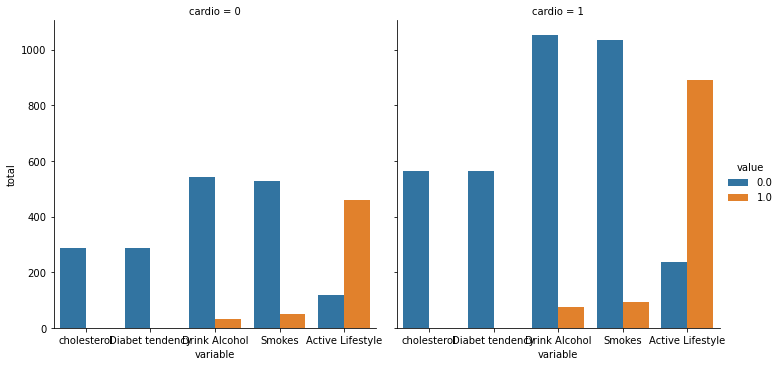

In [29]:
medical_dict = { 1: 0, 2 : 1, 3: 1}
df['cholesterol'] = df['cholesterol'].map( medical_dict )
df['Diabet tendency'] = df['Diabet tendency'].map( medical_dict ) 
df_cat = df.groupby(["cardio", "cholesterol", "Diabet tendency", "Drink Alcohol", "Smokes", "Active Lifestyle"]).size().rename("total").reset_index().melt(['total', 'cardio'])
sns.catplot(data = df_cat, x='variable', y='total', hue='value', col='cardio', kind="bar", ci = None)

In [15]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
# Coefficient of correlation can be from -1 to 1
# mainly it need to be more closer to 1
# If we have low correlation it is bad
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), mask = mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()